#### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 12
### Due: Monday, Apr 25th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on Apr 25th.

**This is your last homework assignment.**

---

## Problem 1

**Density Estimation and Clustering**

Fill in the blanks below and answer all questions. This exercise will take you though some topics from this and last week.

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import homogeneity_score
from sklearn.datasets import make_blobs
from sklearn.neighbors import KernelDensity
from astroML.density_estimation import KNeighborsDensity
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN


Setup up the data set. We will do both density estimation and clustering on it.

In [ ]:
from sklearn.datasets import make_blobs
#Make two blobs with 3 features and 1000 samples
N=1000
X,y = make_blobs(n_samples=N, centers=5, n_features=2, random_state=25)
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], s=_____, c=y)


Start with kernel density estimation, including a grid search to find the best bandwidth.

In [ ]:
bwrange = np.linspace(____,____,____) # Test 30 bandwidths from 0.1 to 1.0 ####
K = ____ # 5-fold cross validation ####
grid = GridSearchCV(KernelDensity(), {'bandwidth': ____}, cv=K) ####
grid.fit(X) #Fit the histogram data that we started the lecture with.
h_opt = ____.best_params_['bandwidth'] ####
print(h_opt)

kde = KernelDensity(kernel='gaussian', bandwidth=h_opt)
kde.fit(X) #fit the model to the data

u = v = np.linspace(-15,15,100)
Xgrid = np.vstack(map(np.ravel, np.meshgrid(u, v))).T
dens = np.exp(kde.score_samples(Xgrid)) #evaluate the model on the grid

plt.scatter(____[:,0],____[:,1], c=dens, cmap="Purples", edgecolor="None") ####
plt.colorbar()


Now try a nearest neighbors approach to estimating the density.
What value of do you need to make the plot look similar to the one above?


In [ ]:

# Compute density with Bayesian nearest neighbors
k=____ ####
nbrs = KNeighborsDensity('bayesian',n_neighbors=____) ####
nbrs.____(X) ####
dens_nbrs = nbrs.eval(Xgrid) / N

plt.scatter(Xgrid[:,0],Xgrid[:,1], c=dens_nbrs, cmap="Purples", edgecolor="None")
plt.colorbar()


Now do a Gaussian mixture model. Do a grid search for between 1 and 10 components.


In [ ]:

#Kludge to fix the bug with draw_ellipse in astroML v1.0
from matplotlib.patches import Ellipse

def draw_ellipse(mu, C, scales=[1, 2, 3], ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()

    # find principal components and rotation angle of ellipse
    sigma_x2 = C[0, 0]
    sigma_y2 = C[1, 1]
    sigma_xy = C[0, 1]

    alpha = 0.5 * np.arctan2(2 * sigma_xy,
                             (sigma_x2 - sigma_y2))
    tmp1 = 0.5 * (sigma_x2 + sigma_y2)
    tmp2 = np.sqrt(0.25 * (sigma_x2 - sigma_y2) ** 2 + sigma_xy ** 2)

    sigma1 = np.sqrt(tmp1 + tmp2)
    sigma2 = np.sqrt(tmp1 - tmp2)

    for scale in scales:
        ax.add_patch(Ellipse((mu[0], mu[1]),
                             2 * scale * sigma1, 2 * scale * sigma2,
                             alpha * 180. / np.pi,
                             **kwargs))

                             
ncomps = np.arange(____,____,____) # Test 10 bandwidths from 1 to 10 ####
K = 5 # 5-fold cross validation
grid = ____(GaussianMixture(), {'n_components': ncomps}, cv=____)  ####
grid.fit(X) #Fit the histogram data that we started the lecture with.
ncomp_opt = grid.____['n_components'] ####
print(ncomp_opt)

gmm = ____(n_components=ncomp_opt) ####
gmm.fit(X)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(X[:,0],X[:,1])

ax.scatter(gmm.means_[:,0], gmm.means_[:,1], marker='s', c='red', s=80)
for mu, C, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
    draw_ellipse(mu, 1*C, scales=[2], ax=ax, fc='none', ec='k') #2 sigma ellipses for each component

Do you get the same answer (the same number of components) each time you run it?
Why is that the case?

Now try Kmeans. Here we will scale the data.


In [ ]:

kmeans = KMeans(n_clusters=5)
scaler = StandardScaler()
X_scaled = ____.____(X) ####
kmeans.fit(X_scaled)
centers=kmeans.____ #location of the clusters ####
labels=kmeans.predict(____) #labels for each of the points ####
centers_unscaled = scaler.____(centers) ####


fig,ax = plt.subplots(1,2,figsize=(16, 8))
ax[0].scatter(X[:,0],X[:,1],c=labels)
ax[0].scatter(centers_unscaled[:,0], centers_unscaled[:,1], marker='s', c='red', s=80)
ax[0].set_title("Predictions")

ax[1].scatter(X[:, 0], X[:, 1], c=y)
ax[1].set_title("Truth")



Let's evaluate how well we did in two other ways: a matrix and a score.


In [ ]:

df = pd.DataFrame({'predictions': labels, 'truth': y})
ct = pd.crosstab(df['predictions'], df['truth'])
print(ct)

from sklearn.metrics.cluster import homogeneity_score
score = homogeneity_score(df['truth'], df['predictions'])
print(score)






What is the score for 3 clusters?


### Solution

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import homogeneity_score
from sklearn.datasets import make_blobs
from sklearn.neighbors import KernelDensity
from astroML.density_estimation import KNeighborsDensity
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

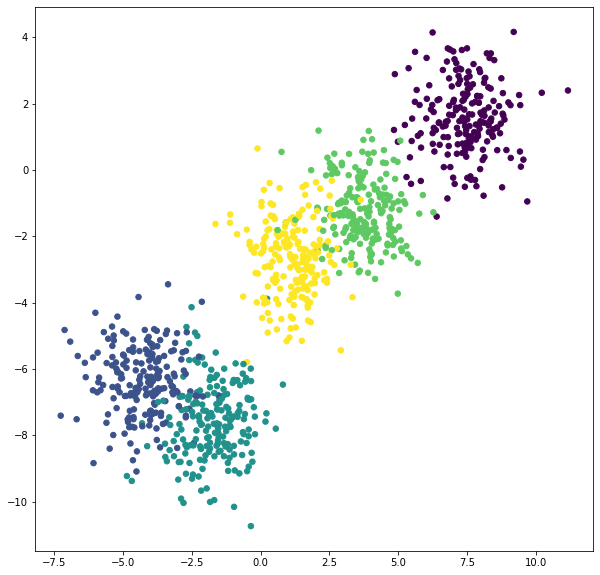

In [120]:
from sklearn.datasets import make_blobs
#Make two blobs with 3 features and 1000 samples
N=1000
X,y = make_blobs(n_samples=N, centers=5, n_features=2, random_state=25)
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], s=30, c=y)

0.4724137931034482


/var/folders/y2/qkxvcl115213lnrfc1ty1dy00000gn/T/ipykernel_39144/3945439564.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  Xgrid = np.vstack(map(np.ravel, np.meshgrid(u, v))).T


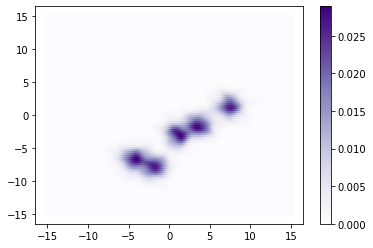

In [121]:
bwrange = np.linspace(0.1, 1.0, 30) # Test 30 bandwidths from 0.1 to 1.0 ####
K = 5 # 5-fold cross validation ####
grid = GridSearchCV(KernelDensity(), {'bandwidth': bwrange}, cv=K) ####
grid.fit(X) #Fit the histogram data that we started the lecture with.
h_opt = grid.best_params_['bandwidth'] ####
print(h_opt)

kde = KernelDensity(kernel='gaussian', bandwidth=h_opt)
kde.fit(X) #fit the model to the data

u = v = np.linspace(-15,15,100)
Xgrid = np.vstack(map(np.ravel, np.meshgrid(u, v))).T
dens = np.exp(kde.score_samples(Xgrid)) #evaluate the model on the grid

plt.scatter(Xgrid[:,0], Xgrid[:,1], c=dens, cmap="Purples", edgecolor="None") ####
plt.colorbar()
plt.show()

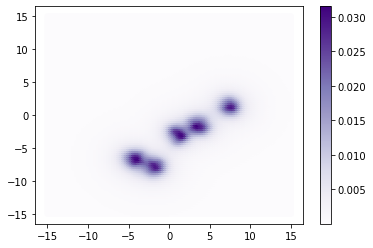

In [91]:
# Compute density with Bayesian nearest neighbors
k=75 ####
nbrs = KNeighborsDensity('bayesian',n_neighbors=k) ####
nbrs.fit(X) ####
dens_nbrs = nbrs.eval(Xgrid) / N

plt.scatter(Xgrid[:,0],Xgrid[:,1], c=dens_nbrs, cmap="Purples", edgecolor="None")
plt.colorbar()
plt.show()

###### What value of do you need to make the plot look similar to the one above?

###### To make the KNeighborsDensity plot look similar to the Kernel Density Estimation, I need to use a k-value of around 75. If I make k too low, then the plot looks sparse and the densities of the blobs are noticeably decreased. If I make k too high, however, the edges of the blobs tend to blur together. At k=75, the blobs have very similar densities and shapes.

5


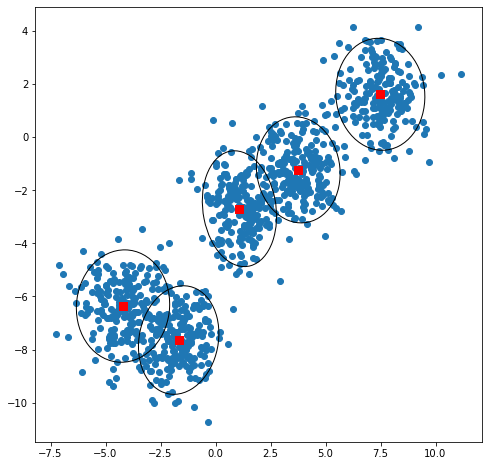

In [132]:
#Kludge to fix the bug with draw_ellipse in astroML v1.0
from matplotlib.patches import Ellipse

def draw_ellipse(mu, C, scales=[1, 2, 3], ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()

    # find principal components and rotation angle of ellipse
    sigma_x2 = C[0, 0]
    sigma_y2 = C[1, 1]
    sigma_xy = C[0, 1]

    alpha = 0.5 * np.arctan2(2 * sigma_xy,
                             (sigma_x2 - sigma_y2))
    tmp1 = 0.5 * (sigma_x2 + sigma_y2)
    tmp2 = np.sqrt(0.25 * (sigma_x2 - sigma_y2) ** 2 + sigma_xy ** 2)

    sigma1 = np.sqrt(tmp1 + tmp2)
    sigma2 = np.sqrt(tmp1 - tmp2)

    for scale in scales:
        ax.add_patch(Ellipse((mu[0], mu[1]),
                             2 * scale * sigma1, 2 * scale * sigma2,
                             alpha * 180. / np.pi,
                             **kwargs))

ncomps = np.arange(1, 10, 1) # Test 10 bandwidths from 1 to 10 ####
K = 5 # 5-fold cross validation
grid = GridSearchCV(GaussianMixture(), {'n_components': ncomps}, cv=K)  ####
grid.fit(X) #Fit the histogram data that we started the lecture with.
ncomp_opt = grid.best_params_['n_components'] ####
print(ncomp_opt)

gmm = GaussianMixture(n_components=ncomp_opt) ####
gmm.fit(X)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(X[:,0],X[:,1])

ax.scatter(gmm.means_[:,0], gmm.means_[:,1], marker='s', c='red', s=80)
for mu, C, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
    draw_ellipse(mu, 1*C, scales=[2], ax=ax, fc='none', ec='k') #2 sigma ellipses for each component

###### Do you get the same answer (the same number of components) each time you run it? Why is that the case?

###### Every time I run this code, I find that the optimal number of components is around five. However, my result is not the same each time I run it. I get 5 as a result most often, but I also get other numbers like 6 and 7. 

###### The GridSearchCV() function uses cross validation to train and evaluate the Gaussian mixture model. Each time the code runs, this function randomly separates the 1000 samples into five groups. Each of the groups takes a turn as the testing set for each value of n_components that the grid search tries. Then, it returns the value of n_components that had the greatest average score, taking into account each of the five folds.

###### Depending upon how the data is split up, the optimal number of components may change. It makes sense that the code usually returns 5 given that the data was made with 5 centers. However, since each run creates new folds with different combinations of data points, it is possible for the grid search to return a number slightly above 5.

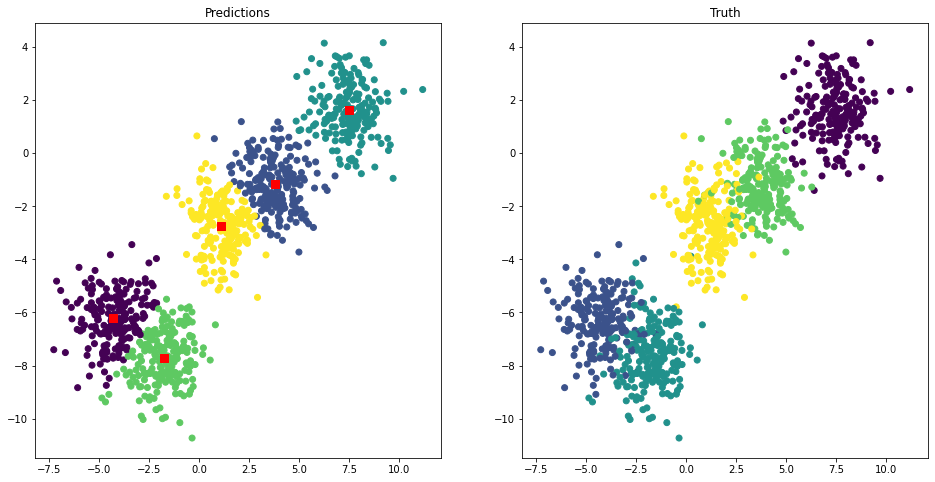

In [66]:
kmeans = KMeans(n_clusters=5)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) ####
kmeans.fit(X_scaled)
centers=kmeans.cluster_centers_ #location of the clusters ####
labels=kmeans.predict(X_scaled) #labels for each of the points ####
centers_unscaled = scaler.inverse_transform(centers) ####


fig,ax = plt.subplots(1,2,figsize=(16, 8))
ax[0].scatter(X[:,0],X[:,1],c=labels)
ax[0].scatter(centers_unscaled[:,0], centers_unscaled[:,1], marker='s', c='red', s=80)
ax[0].set_title("Predictions")

ax[1].scatter(X[:, 0], X[:, 1], c=y)
ax[1].set_title("Truth")
plt.show()

In [64]:
df = pd.DataFrame({'predictions': labels, 'truth': y})
ct = pd.crosstab(df['predictions'], df['truth'])
print(ct)

from sklearn.metrics.cluster import homogeneity_score
score = homogeneity_score(df['truth'], df['predictions'])
print(score)

truth          0    1    2    3    4
predictions                         
0              0  184   14    0    0
1            194    0    0    1    0
2              6    0    0  188   14
3              0    0    1   11  185
4              0   16  185    0    1
0.8473360929533544


###### What is the score for 3 clusters?

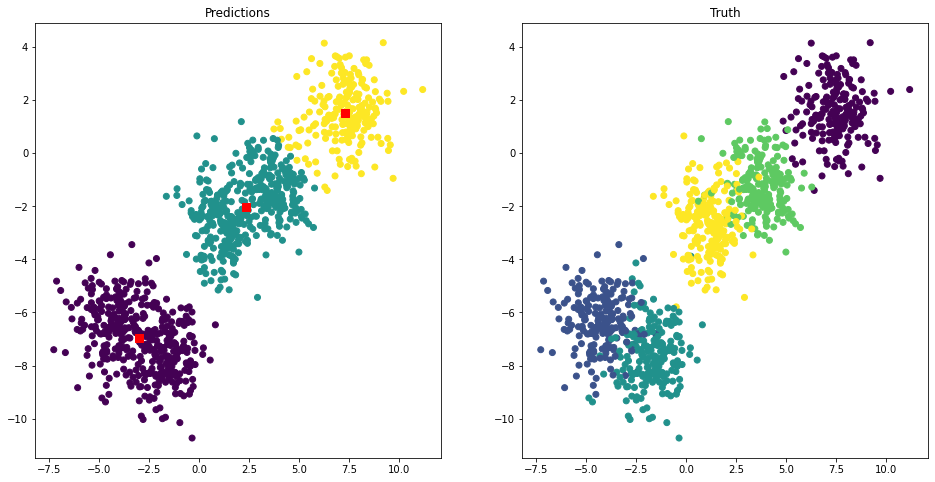

In [76]:
kmeans = KMeans(n_clusters=3)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) ####
kmeans.fit(X_scaled)
centers=kmeans.cluster_centers_ #location of the clusters ####
labels=kmeans.predict(X_scaled) #labels for each of the points ####
centers_unscaled = scaler.inverse_transform(centers) ####


fig,ax = plt.subplots(1,2,figsize=(16, 8))
ax[0].scatter(X[:,0],X[:,1],c=labels)
ax[0].scatter(centers_unscaled[:,0], centers_unscaled[:,1], marker='s', c='red', s=80)
ax[0].set_title("Predictions")

ax[1].scatter(X[:, 0], X[:, 1], c=y)
ax[1].set_title("Truth")
plt.show()

In [77]:
df = pd.DataFrame({'predictions': labels, 'truth': y})
ct = pd.crosstab(df['predictions'], df['truth'])
print(ct)

from sklearn.metrics.cluster import homogeneity_score
score = homogeneity_score(df['truth'], df['predictions'])
print(score)

truth          0    1    2    3    4
predictions                         
0              0  200  199    0    1
1              0    0    1  187  199
2            200    0    0   13    0
0.6229568833968279


###### The score for 3 clusters is 0.623. This is significantly less than the score for 5 clusters, which is 0.847. The data blobs were created with 5 centers, so it makes perfect sense that the kmeans using 5 clusters does a better job at separating the data than the kmeans with only 3 clusters.